<a href="https://colab.research.google.com/github/siddugarikapati/Amazon-Clone/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import warnings
import random
warnings.filterwarnings('ignore')

In [ ]:
tracks = pd.read_csv('/content/dataset.csv')
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
tracks.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


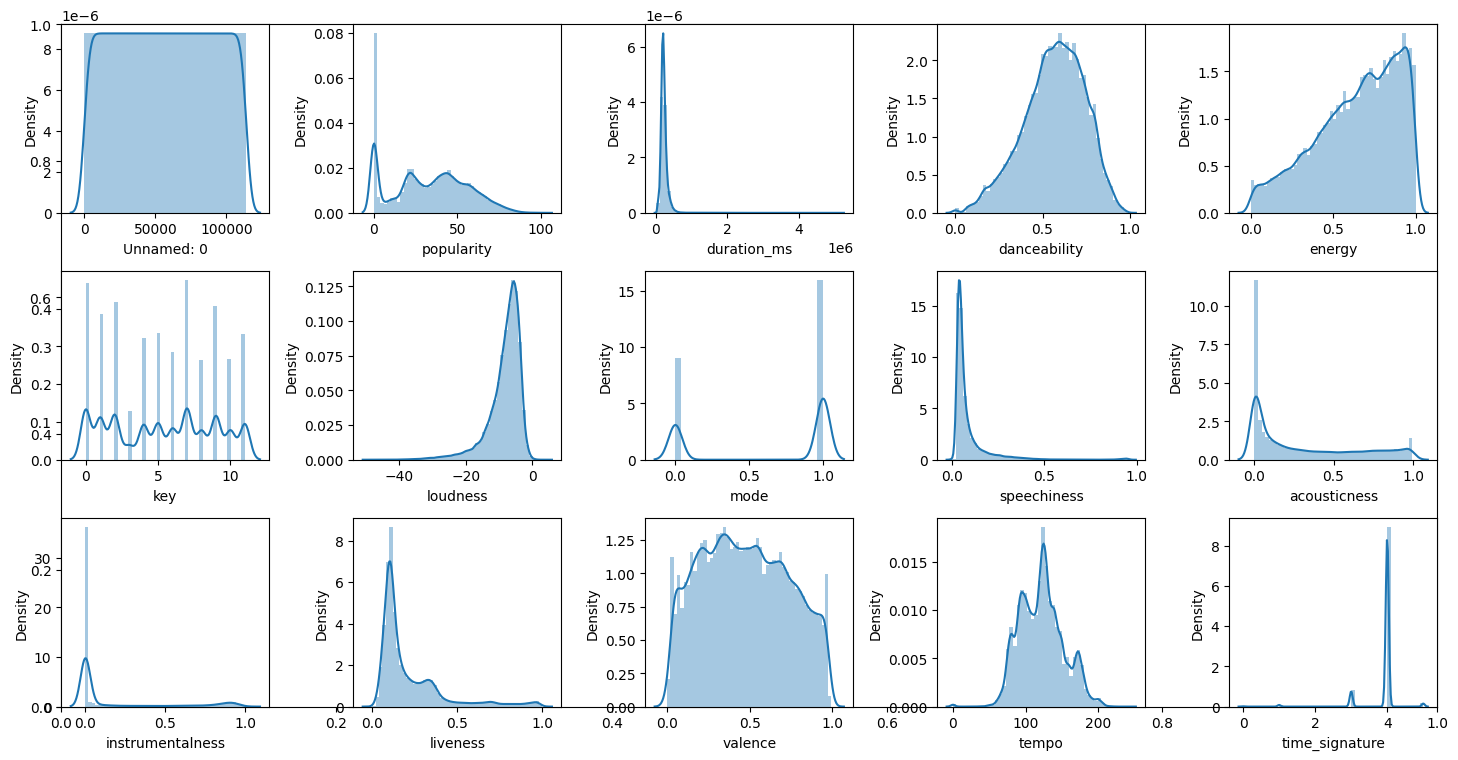

In [ ]:
plt.subplots(figsize=(15, 8))
num_cols = tracks.select_dtypes(include=['float64', 'int64']).columns

num_rows = 3
num_cols_subplot = 5

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_subplot, i + 1)
    sb.distplot(tracks[col])
    plt.tight_layout()

plt.show()


In [ ]:
tracks.shape


(114000, 21)

In [ ]:
tracks.isnull().sum()
tracks.dropna(inplace=True)


In [ ]:
tracks = tracks[['Unnamed: 0', 'track_id', 'track_name','artists', 'popularity', 'danceability',
                 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
print(tracks.head())


   Unnamed: 0                track_id                  track_name  \
0           0  5SuOikwiRyPMVoIQDJUgSV                      Comedy   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ghost - Acoustic   
2           2  1iJBSr7s7jYXzM8EGcbK5b              To Begin Again   
3           3  6lfxq3CG4xtTiEg7opyCyx  Can't Help Falling In Love   
4           4  5vjLSffimiIP26QG5WcN2K                     Hold On   

                  artists  popularity  danceability  energy  key  loudness  \
0             Gen Hoshino          73         0.676  0.4610    1    -6.746   
1            Ben Woodward          55         0.420  0.1660    1   -17.235   
2  Ingrid Michaelson;ZAYN          57         0.438  0.3590    0    -9.734   
3            Kina Grannis          71         0.266  0.0596    0   -18.515   
4        Chord Overstreet          82         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322       

In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)


In [ ]:
num_features = tracks.select_dtypes(include=['float64', 'int64']).columns
num_features


Index(['Unnamed: 0', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
X = tracks.drop('popularity', axis=1)
y = tracks['popularity']
print(X)
print(y)


        Unnamed: 0                track_id  \
20001        20001  3nqQXoyQOWXiESFLlDF1hG   
51664        51664  2tTmW7RDtMQtBk7m2rYeSw   
89411        89411  5ww2BF9slyYgNOk37BlC4u   
81210        81210  4uUG5RXrOk84mYEfFvj3cK   
68304        68304  1IHWl5LamUGEuP4ozKQSXZ   
...            ...                     ...   
53547        53547  52y30MrhmdXnF0VaxJPLNz   
100672      100672  4JI4Swf1PJQt4FihB3NjRE   
53542        53542  4nrW9uaXU2GqPZl5zgNRNp   
53498        53498  0bgCV5x6FxiaDC9PRLY0xV   
59964        59964  4zKQYMQrd6QuyzoOCZmf6C   

                                        track_name  \
20001                    Unholy (feat. Kim Petras)   
51664        Quevedo: Bzrp Music Sessions, Vol. 52   
89411                                   La Bachata   
81210                              I'm Good (Blue)   
68304                             Tití Me Preguntó   
...                                            ...   
53547   This Girl - Kungs Vs. Cookin' On 3 Burners   
100672         

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tracks[num_features])


In [ ]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)


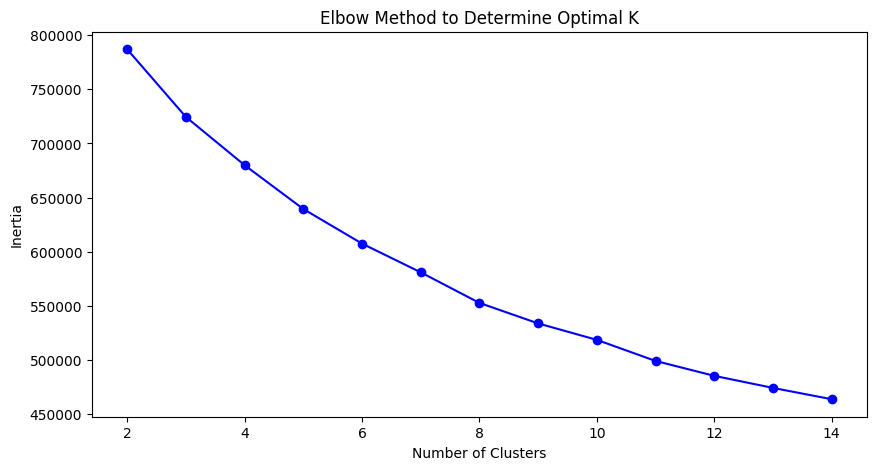

In [ ]:
inertia = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


In [ ]:
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
tracks['cluster'] = kmeans.fit_predict(pca_data)


In [ ]:
tracks.columns = tracks.columns.str.strip()


In [ ]:
def recommend_songs(song_name, data=tracks, num_recommendations=5):
    if 'track_name' not in data.columns:
        print("Error: Column 'track_name' not found in dataset.")
        return
    if song_name not in data['track_name'].values:
        print("This song is not in the dataset. Here are some random suggestions:")
        print(data.sample(n=num_recommendations)[['track_name', 'artists']])
        return

    song_cluster = data.loc[data['track_name'] == song_name, 'cluster'].values[0]
    cluster_songs = data[data['cluster'] == song_cluster]

    if len(cluster_songs) <= num_recommendations:
        recommended_songs = cluster_songs
    else:
        larger_sample = cluster_songs.sample(n=min(20, len(cluster_songs)))
        recommended_songs = larger_sample.sample(n=num_recommendations, random_state=random.randint(1, 100))

    print(f"\nSongs similar to '{song_name}':")
    print(recommended_songs[['track_name', 'artists']])


In [ ]:
recommend_songs('Shape of You')



Songs similar to 'Shape of You':
               track_name        artists
31792   Boy In The Bubble  Alec Benjamin
96463  A Comunidade Chora  Samba da Vela
60497     The World Turns    Vybz Kartel
39907    You Make Me Feel        Bonfire
43267         Take a Hold        Calippo


In [ ]:
def precision_recall_at_k(song_name, k=5, data=tracks):
    if song_name not in data['track_name'].values:
        print(f"{song_name} not found in dataset.")
        return

    song_cluster = data.loc[data['track_name'] == song_name, 'cluster'].values[0]
    relevant_songs = data[data['cluster'] == song_cluster]['track_name'].tolist()
    recommended_songs = data[data['cluster'] == song_cluster].sample(n=k)['track_name'].tolist()

    relevant_recommendations = set(recommended_songs) & set(relevant_songs)
    precision = len(relevant_recommendations) / k
    recall = len(relevant_recommendations) / len(relevant_songs)

    print(f"Precision@{k}: {precision:.4f}")
    print(f"Recall@{k}: {recall:.4f}")


In [ ]:
precision_recall_at_k('Shape of You')


Precision@5: 1.0000
Recall@5: 0.0003


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

def gmm_clustering_accuracy(data, true_labels, n_components=8):
    features = data.select_dtypes(include=['float64', 'int64']).dropna()

    # Debugging: Check if features exist
    print(f"Feature Data Shape: {features.shape}")

    # Ensure we have enough data points for clustering
    if len(features) < n_components:
        print(f"Error: Not enough data points ({len(features)}) for {n_components} clusters.")
        return

    model = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)

    try:
        predicted_clusters = model.fit_predict(features)
        bic = model.bic(features)
        ari = adjusted_rand_score(true_labels.loc[features.index], predicted_clusters)

        print(f"GMM - BIC Score: {bic:.2f}")
        print(f"GMM - Adjusted Rand Index: {ari:.4f}")

    except Exception as e:
        print(f"Error during GMM clustering: {e}")

# Call the function
gmm_clustering_accuracy(tracks, tracks['cluster'])


Feature Data Shape: (73608, 15)
GMM - BIC Score: 4306563.57
GMM - Adjusted Rand Index: 0.1344


In [ ]:
gmm = GaussianMixture(n_components=8, random_state=42)
tracks['gmm_cluster'] = gmm.fit_predict(pca_data)

silhouette_gmm = silhouette_score(pca_data, tracks['gmm_cluster'])
print(f"Silhouette Score (GMM): {silhouette_gmm:.4f}")


Silhouette Score (GMM): 0.0322


In [ ]:
from sklearn.cluster import DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, adjusted_rand_score
dbscan = DBSCAN(eps=2, min_samples=5)
tracks['dbscan_cluster'] = dbscan.fit_predict(pca_data)
filtered_data = tracks[tracks['dbscan_cluster'] != -1]
if len(filtered_data) > 0:
    silhouette_dbscan = silhouette_score(filtered_data[num_features], filtered_data['dbscan_cluster'])
    print(f"DBSCAN - Silhouette Score: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN couldn't form meaningful clusters. Try adjusting `eps` and `min_samples`.")
mean_shift = MeanShift()
tracks['mean_shift_cluster'] = mean_shift.fit_predict(pca_data)
ari_mean_shift = adjusted_rand_score(tracks['cluster'], tracks['mean_shift_cluster'])
print(f"Mean Shift - Adjusted Rand Index: {ari_mean_shift:.4f}")


DBSCAN - Silhouette Score: -0.3142


KeyboardInterrupt: 